In [138]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [139]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [230]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


2973

In [141]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [142]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [143]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [144]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [145]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [146]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [147]:
sum(city_data_df["type"]=="Suburban")

36

In [148]:
sum(city_data_df["type"]=="Rural")

18

In [149]:
# Get the columns and the rows that are not null.
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [150]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [151]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [231]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()


68709

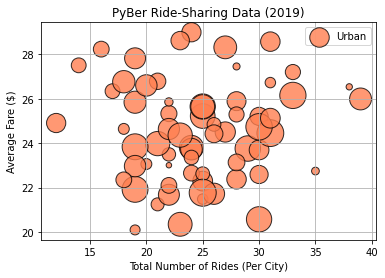

In [153]:
# Create the Urban, Suburban & Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count, c="coral",edgecolor="black", linewidths=1,
       alpha=0.8,label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

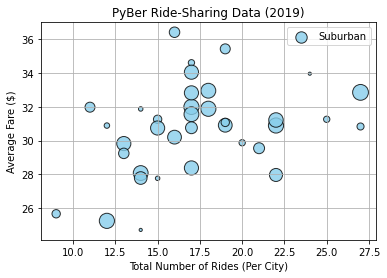

In [154]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count =suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count, c="skyblue",edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

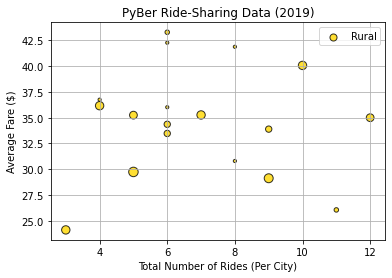

In [155]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

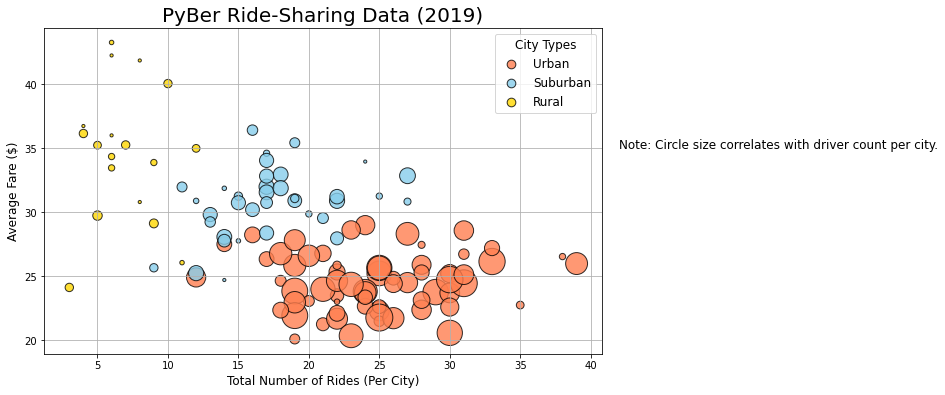

In [156]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best" , title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [157]:
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [158]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [159]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [160]:
suburban_ride_count.mode()

0    17
dtype: int64

In [161]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [162]:
rural_ride_count.mode()

0    6
dtype: int64

In [163]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [164]:
#urban_cities_df["fare"].describe()

In [179]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [166]:
# Get the fares for the urban cities.
suburban_fares = suburban_cities_df["fare"]
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [167]:
# Get the fares for the urban cities.
rural_fares = rural_cities_df["fare"]
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [168]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban city is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(mean_urban_drivers)
print(f"The median number of drivers for urban city is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban city is {mode_urban_drivers}.")


The mean number of drivers for urban city is 36.68.
The median number of drivers for urban city is 36.68.
The mode number of drivers for urban city is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [169]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban city is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(mean_suburban_drivers)
print(f"The median number of drivers for suburban city is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban city is {mode_suburban_drivers}.")

The mean number of drivers for suburban city is 13.71.
The median number of drivers for suburban city is 13.71.
The mode number of drivers for suburban city is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [170]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural city is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(mean_rural_drivers)
print(f"The median number of drivers for rural city is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural city is {mode_rural_drivers}.")

The mean number of drivers for rural city is 4.30.
The median number of drivers for rural city is 4.30.
The mode number of drivers for rural city is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [171]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

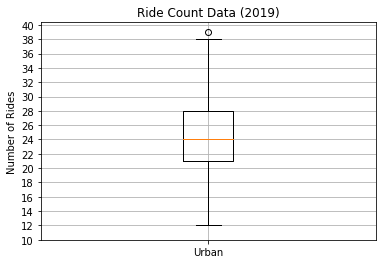

In [172]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [173]:
# Create a box-and-whisker plot for the urban cities ride count.
#x_labels = ["Urban"]
#fig, ax = plt.subplots()
#plt.boxplot(urban_ride_count, labels=["Urban"])
# Add the title, y-axis label and grid.
#plt.title('Ride Count Data (2019)')
#plt.ylabel('Number of Rides')
#plt.yticks(np.arange(10, 41, step=2.0))
#plt.grid(True)
#plt.show()


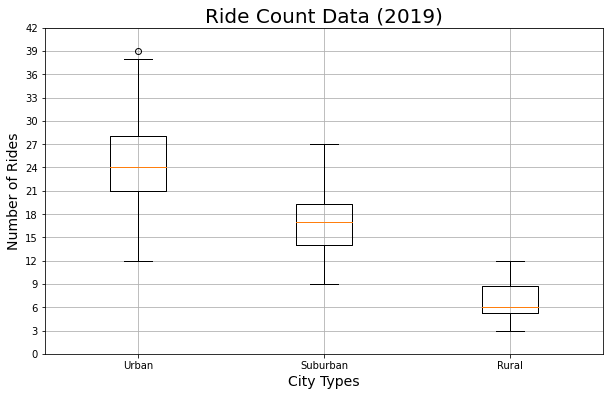

In [174]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [175]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


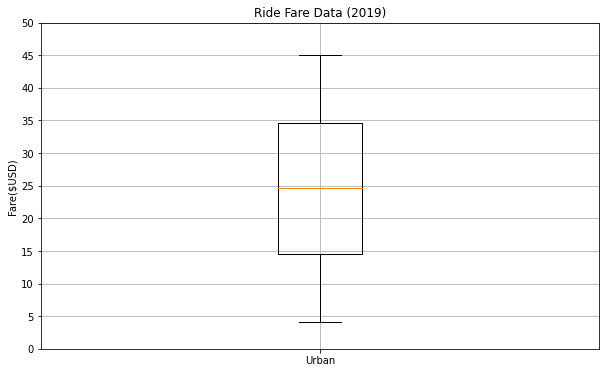

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [176]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

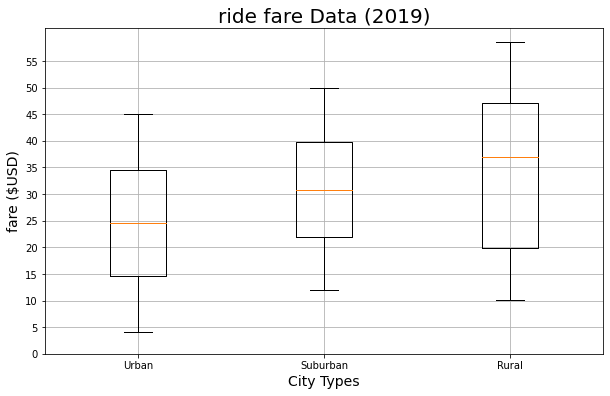

In [182]:
# Add all fare count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('ride fare Data (2019)',fontsize=20)
ax.set_ylabel('fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

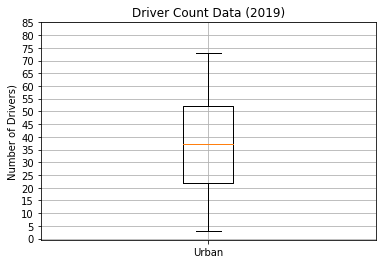

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [183]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

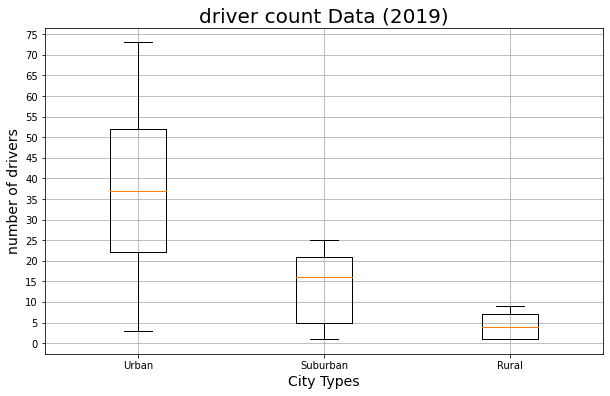

In [186]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
drivers_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('driver count Data (2019)',fontsize=20)
ax.set_ylabel('number of drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(drivers_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [193]:
sum_fares_by_type=pyber_data_df.groupby(pyber_data_df["type"])["fare"].sum()
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [194]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [196]:
type_fares_percentage = sum_fares_by_type / total_fares *100
type_fares_percentage 

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

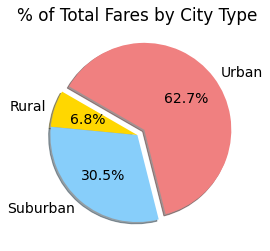

In [205]:
# Build the percentage of fares by city type pie chart.
import matplotlib as mpl
plt.pie(type_fares_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [208]:
sum_ride_by_type=pyber_data_df.groupby(pyber_data_df["type"])["ride_id"].count()
sum_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [210]:
total_ride = pyber_data_df["ride_id"].count()
total_ride

2375

In [212]:
type_ride_percentage = sum_ride_by_type / total_ride *100
type_ride_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

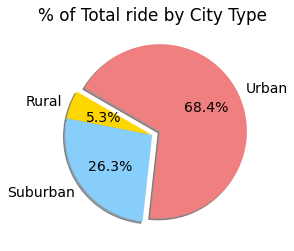

In [213]:
# Build the percentage of fares by city type pie chart.
import matplotlib as mpl
plt.pie(type_ride_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total ride by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [229]:
type_drivers_percentage = pyber_data_df.groupby(["type"])["driver_count"].sum() / pyber_data_df["driver_count"].sum() *100
type_drivers_percentage 

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

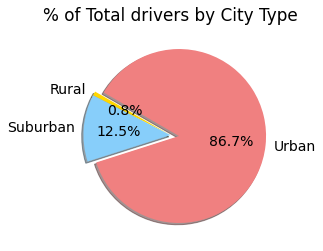

In [224]:
import matplotlib as mpl
plt.pie(type_drivers_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total drivers by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [228]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

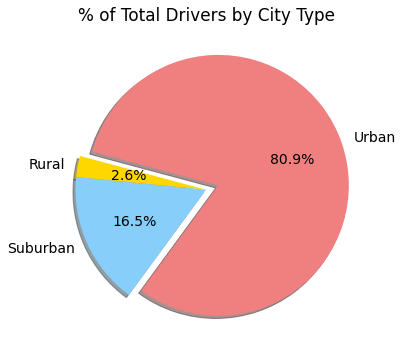

In [232]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,  labels=["Rural", "Suburban", "Urban"],  colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()